In [314]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('jedinstveni.csv')
df.drop(columns=['Broj sedišta'], inplace=True)
df.drop(columns=['Boja enterijera'], inplace=True)
#Strana volana je uvek leva
df = df.drop('Strana volana', axis=1)
#Stanje je na svim automobilima uneseno kao polovno vozilo
df = df.drop('Stanje', axis=1)

In [315]:
#Koliko imamo nedostajucih vrednosti po svakoj koloni
df.isnull().sum()

Cena                       0
Model                      0
Marka                      0
Godište                    0
Kubikaža                  10
Gorivo                     0
Karoserija                 0
Snaga motora               0
Kilometraža                0
Oštećenje                  0
Pogon                      0
Klima                      0
Materijal enterijera     519
Menjač                     0
Broj vrata                 0
Boja                       0
Emisiona klasa motora      0
Safety_Features          140
Equipment_Features       133
dtype: int64

<Axes: >

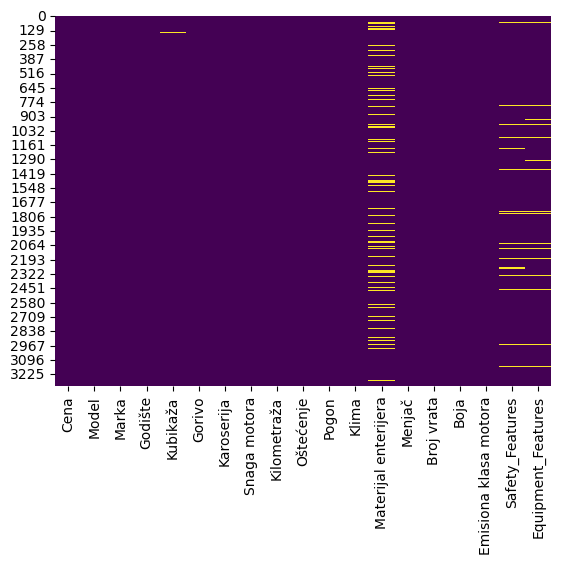

In [316]:
#vizualizacija nedostajucih vrednosti po kolonama
import seaborn as seab
seab.heatmap(df.isnull(),cbar=False,cmap='viridis')

In [317]:
missing_rows = df[df['Kubikaža'].isnull()]
print(missing_rows)


          Cena    Model       Marka  Godište Kubikaža            Gorivo  \
146   22.900 €  Model S       Tesla   2013.0      NaN  Električni pogon   
556    7.400 €   ForTwo       Smart   2015.0      NaN  Električni pogon   
1787  22.900 €  Model S       Tesla   2013.0      NaN  Električni pogon   
2577  11.999 €  ForFour       Smart   2017.0      NaN  Električni pogon   
2649  19.100 €     Kona     Hyundai   2018.0      NaN  Električni pogon   
2775   9.900 €   ForTwo       Smart   2017.0      NaN  Električni pogon   
2962   7.990 €      iOn     Peugeot   2016.0      NaN  Električni pogon   
2979  15.000 €     Leaf      Nissan   2018.0      NaN  Električni pogon   
3075  20.000 €   Golf 7  Volkswagen   2018.0      NaN  Električni pogon   
3093   6.700 €   C-Zero     Citroen   2017.0      NaN  Električni pogon   

     Karoserija     Snaga motora Kilometraža     Oštećenje    Pogon  \
146    Limuzina  310/421 (kW/KS)  163.421 km  Nije oštećen   Zadnji   
556      Hečbek    17/23 (kW/KS)

In [318]:
print(missing_rows['Kubikaža'], missing_rows['Gorivo'])

146     NaN
556     NaN
1787    NaN
2577    NaN
2649    NaN
2775    NaN
2962    NaN
2979    NaN
3075    NaN
3093    NaN
Name: Kubikaža, dtype: object 146     Električni pogon
556     Električni pogon
1787    Električni pogon
2577    Električni pogon
2649    Električni pogon
2775    Električni pogon
2962    Električni pogon
2979    Električni pogon
3075    Električni pogon
3093    Električni pogon
Name: Gorivo, dtype: object


In [319]:
df['Gorivo'].value_counts()

Gorivo
Dizel                      2300
Benzin                      820
Benzin + Gas (TNG)          131
Benzin + Metan (CNG)         36
Hibridni pogon               18
Električni pogon             10
Hibridni pogon (Benzin)       6
Hibridni pogon (Dizel)        6
Plug-in hibrid                1
Name: count, dtype: int64

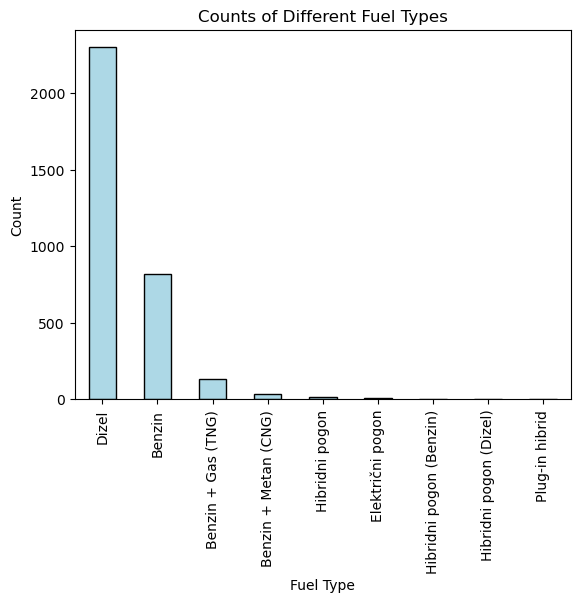

In [320]:
df['Gorivo'].value_counts().plot(kind='bar', color='lightblue', edgecolor='black')
plt.title('Counts of Different Fuel Types')
plt.xlabel('Fuel Type')
plt.ylabel('Count')
plt.show()

In [321]:
#Zakljucujemo da ne zelimo da radimo sa elektricnim i hibridnim vozililma jer ih ima ukupno 41 (premalo)
#Benzin u kombiniciji sa TNG i CNG cemo spojiti u jednu kategoriju
def categorize_fuel(value):
    if value == 'Dizel':
        return 'Dizel'
    elif value == 'Benzin':
        return 'Benzin'
    elif value in ['Benzin + Gas (TNG)', 'Benzin + Metan (CNG)']:
        return 'Gas'
    else:
        return 'Other'

df['Gorivo'] = df['Gorivo'].apply(categorize_fuel)

df = df[df['Gorivo'] != 'Other']

Gorivo
Dizel     2300
Benzin     820
Gas        167
Name: count, dtype: int64


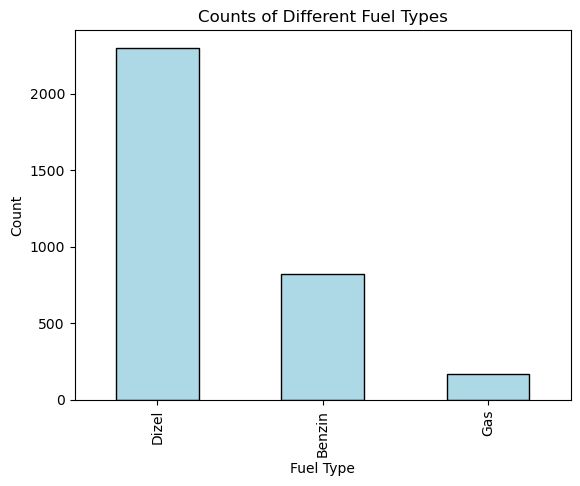

In [322]:
#Prema tipu goriva skup nije balansiran
print(df['Gorivo'].value_counts())
df['Gorivo'].value_counts().plot(kind='bar', color='lightblue', edgecolor='black')
plt.title('Counts of Different Fuel Types')
plt.xlabel('Fuel Type')
plt.ylabel('Count')
plt.show()

In [323]:
#Koliko imamo nedostajucih vrednosti po svakoj koloni
df.isnull().sum()

Cena                       0
Model                      0
Marka                      0
Godište                    0
Kubikaža                   0
Gorivo                     0
Karoserija                 0
Snaga motora               0
Kilometraža                0
Oštećenje                  0
Pogon                      0
Klima                      0
Materijal enterijera     517
Menjač                     0
Broj vrata                 0
Boja                       0
Emisiona klasa motora      0
Safety_Features          138
Equipment_Features       132
dtype: int64

In [324]:
# iz safety features i equipment smo pretrazivali samo koliko imaju iz skupa izabranih
# a ako uopste nema vrednosti nikakve onda stavljamo missing kao broj
valid_safety_features = ["Airbag", "Child lock", "ABS", "Blokada motora", "Ulazak bez ključa"]
def count_valid_safety_features(features):
    if pd.notnull(features):  # Check if not NaN
        return sum(1 for feature in features.split(';') if any(valid in feature for valid in valid_safety_features))
    return 'missing'
df['Safety_Feature_Count'] = df['Safety_Features'].apply(count_valid_safety_features)
valid_equipment_features = ["Sportska sedišta", "Tempomat", "Senzori za kišu", "Parking senzori", "Aluminijumske felne", "Multimedija"]
def count_valid_equipment_features(features):
    if pd.notnull(features):  # Check if not NaN
        return sum(1 for feature in features.split(';') if any(valid in feature for valid in valid_equipment_features))
    return 'missing'
df['Equipment_Feature_Count'] = df['Equipment_Features'].apply(count_valid_equipment_features)

df = df.drop('Safety_Features', axis=1)
df = df.drop('Equipment_Features', axis=1)

print(df[['Safety_Feature_Count', 'Equipment_Feature_Count']])

     Safety_Feature_Count Equipment_Feature_Count
0                       4                       2
1                       4                       4
2                       4                       1
3                       4                       3
4                       4                       1
...                   ...                     ...
3323                    3                       5
3324                    4                       5
3325                    3                       5
3326              missing                 missing
3327                    5                       5

[3287 rows x 2 columns]


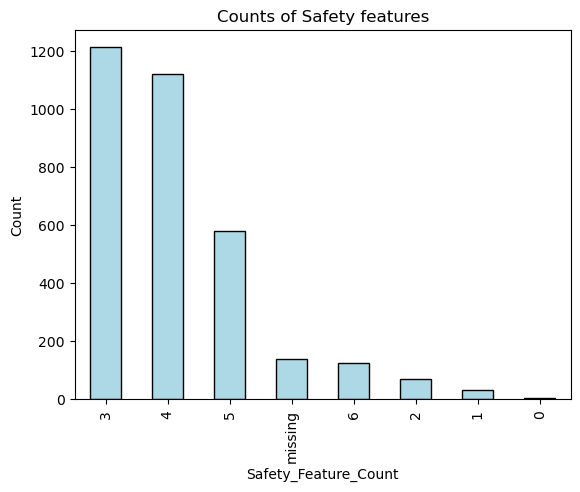

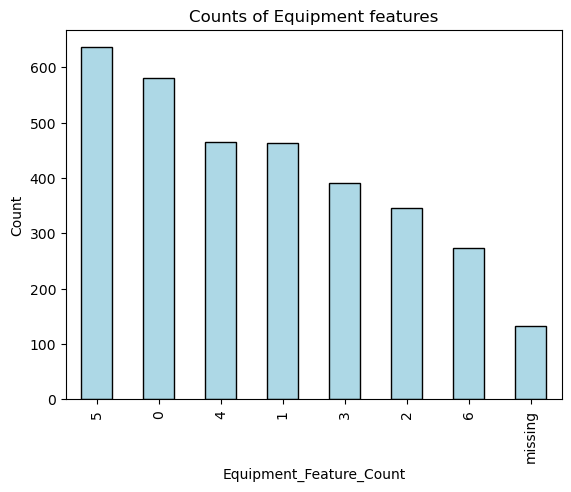

In [325]:
#Nedostajuce vrednosti cemo interpolirati zato sto se radi o nebalansiranom skupu slicnom normalnoj raspodeli
df['Safety_Feature_Count'].value_counts().plot(kind='bar', color='lightblue', edgecolor='black')
plt.title('Counts of Safety features')
plt.ylabel('Count')
plt.show()

#Ovde je situacija relativno balansirana pa je dovoljno iskoristiti medijanu za popunjavanje nedostajucih vrednosti
df['Equipment_Feature_Count'].value_counts().plot(kind='bar', color='lightblue', edgecolor='black')
plt.title('Counts of Equipment features')
plt.ylabel('Count')
plt.show()

In [326]:
# Replace 'missing' with NaN for easier handling, when errors='coerce' is set, non-numeric values are converted to NaN instead of raising an error
df['Safety_Feature_Count'] = pd.to_numeric(df['Safety_Feature_Count'], errors='coerce')

# Interpolate missing values using polynomial interpolation
df['Safety_Feature_Count'] = df['Safety_Feature_Count'].interpolate(method='polynomial', order=2).round().clip(upper=6)

print(df['Safety_Feature_Count'].value_counts())


Safety_Feature_Count
3.0    1253
4.0    1173
5.0     602
6.0     133
2.0      87
1.0      35
0.0       4
Name: count, dtype: int64


In [327]:
# Replace 'missing' with NaN for easier handling, when errors='coerce' is set, non-numeric values are converted to NaN instead of raising an error
df['Equipment_Feature_Count'] = pd.to_numeric(df['Equipment_Feature_Count'], errors='coerce')

# Calculate the median of 'Equipment_Feature_Count' excluding 'NaN' values
median_value = df['Equipment_Feature_Count'].median()

# Replace 'NaN' (which represents 'missing') with the calculated median
df['Equipment_Feature_Count'] = df['Equipment_Feature_Count'].fillna(median_value)

print(df['Equipment_Feature_Count'].value_counts())

Equipment_Feature_Count
5.0    636
0.0    580
3.0    523
4.0    465
1.0    464
2.0    346
6.0    273
Name: count, dtype: int64


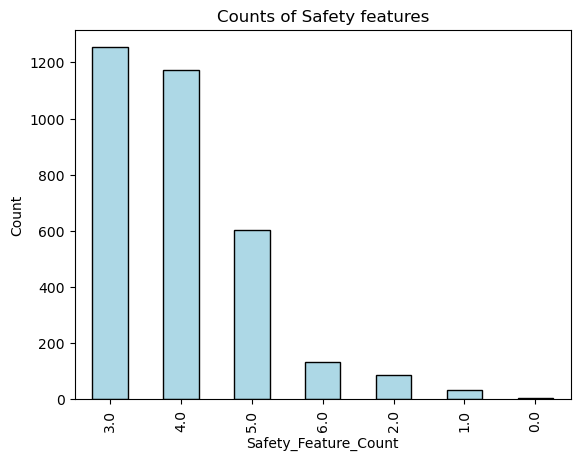

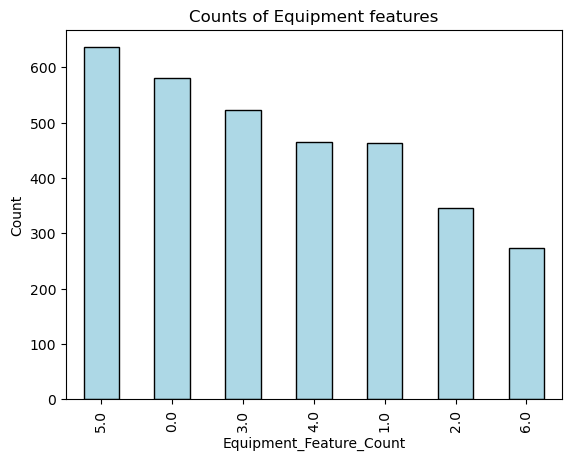

In [328]:
df['Safety_Feature_Count'].value_counts().plot(kind='bar', color='lightblue', edgecolor='black')
plt.title('Counts of Safety features')
plt.ylabel('Count')
plt.show()

#Ovde je situacija bila relativno balansirana pa je dovoljno iskoristiti medijanu za popunjavanje nedostajucih vrednosti
df['Equipment_Feature_Count'].value_counts().plot(kind='bar', color='lightblue', edgecolor='black')
plt.title('Counts of Equipment features')
plt.ylabel('Count')
plt.show()

In [329]:
#Posto nedostajucih vrednosti ima oko 500,600 mozemo iskoristiti dodavanje nove kategorije 'nepoznato' za njih
df['Materijal enterijera'] = df['Materijal enterijera'].fillna('Nepoznato')
print(df['Materijal enterijera'].value_counts())

Materijal enterijera
Štof                1767
Nepoznato            517
Prirodna koža        512
Kombinovana koža     404
Drugi                 49
Velur                 38
Name: count, dtype: int64


In [330]:
#Sada nemamo vise nedostajucih vrednosti
df.isnull().sum()

Cena                       0
Model                      0
Marka                      0
Godište                    0
Kubikaža                   0
Gorivo                     0
Karoserija                 0
Snaga motora               0
Kilometraža                0
Oštećenje                  0
Pogon                      0
Klima                      0
Materijal enterijera       0
Menjač                     0
Broj vrata                 0
Boja                       0
Emisiona klasa motora      0
Safety_Feature_Count       0
Equipment_Feature_Count    0
dtype: int64

In [331]:
def clean_currency(value):
    return float(value.replace('€', '').replace('.', '').strip())
def clean_mileage(value):
    return float(value.replace('km', '').replace('.', '').strip())
def clean_engine_volume(value):
    if "cm3" in value:
        return float(value.replace('cm3', '').replace('.', '').strip())
    return value 
def extract_kw(value):
    return float(value.split('/')[0].strip())

In [332]:
df['Cena'] = df['Cena'].apply(clean_currency)
df['Kilometraža'] = df['Kilometraža'].apply(clean_mileage)
df['Snaga motora'] = df['Snaga motora'].apply(extract_kw)
df['Kubikaža'] = df['Kubikaža'].apply(clean_engine_volume)
print(df)

         Cena              Model          Marka  Godište  Kubikaža Gorivo  \
0      3200.0            Astra H           Opel   2006.0    1686.0  Dizel   
1      9500.0                 A3           Audi   2013.0    1598.0  Dizel   
2      4000.0            Octavia          Škoda   2008.0    1896.0  Dizel   
3      3300.0              A 180  Mercedes Benz   2008.0    1991.0  Dizel   
4      3550.0            Corsa D           Opel   2009.0    1229.0    Gas   
...       ...                ...            ...      ...       ...    ...   
3323  34990.0                730            BMW   2016.0    2993.0  Dizel   
3324  17500.0                 A4           Audi   2016.0    1968.0  Dizel   
3325  10500.0             Golf 7     Volkswagen   2017.0    1598.0  Dizel   
3326  13500.0             Superb          Škoda   2017.0    2000.0  Dizel   
3327  29200.0  Range Rover Velar     Land Rover   2017.0    1999.0  Dizel   

     Karoserija  Snaga motora  Kilometraža     Oštećenje    Pogon  \
0     

In [333]:
# izbacivanje duplikata nakon ciscenja podataka (ukoliko se neki sakrio)
print(df.shape[0])
df = df.drop_duplicates()
print(df.shape[0])

3287
3264


In [334]:
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import seaborn as sns

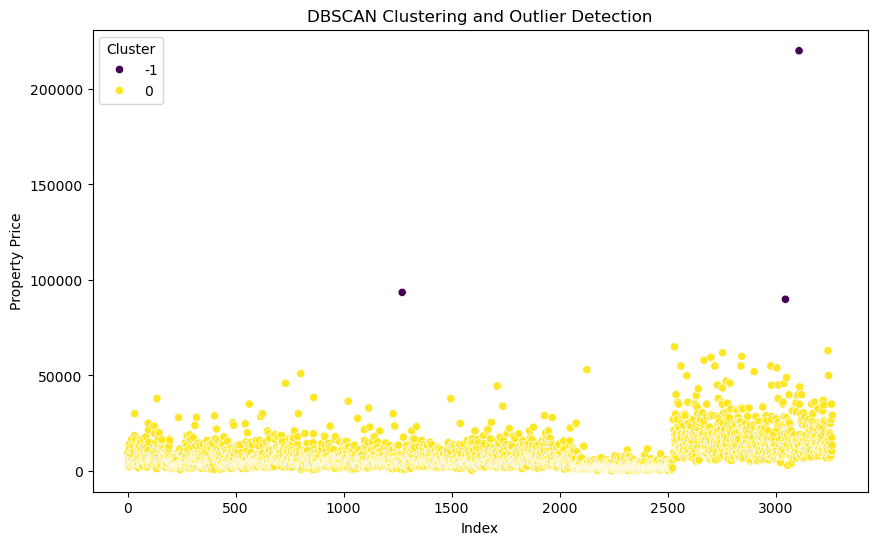

Detected Outliers:
          Cena     Model          Marka  Godište  Kubikaža  Gorivo Karoserija  \
1296   93500.0  S 63 AMG  Mercedes Benz   2015.0    5461.0  Benzin       Kupe   
3100   89900.0     G 350  Mercedes Benz   2018.0    2987.0   Dizel   Džip/SUV   
3166  220000.0      Urus    Lamborghini   2018.0    3996.0  Benzin   Džip/SUV   

      Snaga motora  Kilometraža     Oštećenje Pogon             Klima  \
1296         430.0     119983.0  Nije oštećen   4x4  Automatska klima   
3100         180.0      28165.0  Nije oštećen   4x4  Automatska klima   
3166         478.0      84193.0  Nije oštećen   4x4  Automatska klima   

     Materijal enterijera                       Menjač Broj vrata    Boja  \
1296     Kombinovana koža  Automatski / poluautomatski  2/3 vrata    Crna   
3100        Prirodna koža  Automatski / poluautomatski  4/5 vrata  Zelena   
3166        Prirodna koža  Automatski / poluautomatski  4/5 vrata    Siva   

     Emisiona klasa motora  Safety_Feature_Count  Equi

In [335]:
prices = df[['Cena']].values

# Step 3: Normalize or scale the data (optional, depending on the range of prices)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
prices_scaled = scaler.fit_transform(prices)

# Step 4: Apply DBSCAN
# Adjust eps (radius) and min_samples (minimum points in a cluster) based on your data
dbscan = DBSCAN(eps=0.5, min_samples=5)
labels = dbscan.fit_predict(prices_scaled)

# Step 5: Add DBSCAN labels to the dataframe
df['Cluster'] = labels

# Outliers are labeled as -1 by DBSCAN
outliers = df[df['Cluster'] == -1]

# Step 6: Visualize the results
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x=range(len(df)), y='Cena', hue='Cluster', palette='viridis')
plt.title('DBSCAN Clustering and Outlier Detection')
plt.xlabel('Index')
plt.ylabel('Property Price')
plt.legend(title='Cluster')
plt.show()

# Step 7: Save or analyze the outliers
print("Detected Outliers:")
print(outliers)

In [336]:
# nakon detektovanja outlier-a izbacicemo ih iz skupa
df = df[df['Cluster'] != -1].drop(columns=['Cluster'])

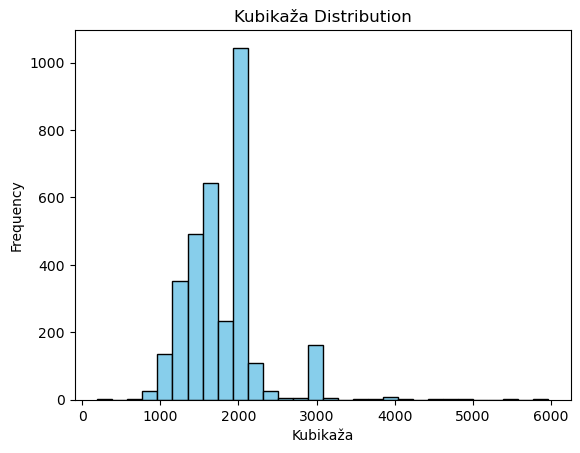

In [337]:
# treba malo pogledati raspodele stvari koje normalizujemo
import matplotlib.pyplot as plt

# Plot the histogram
plt.hist(df['Kubikaža'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Kubikaža')
plt.ylabel('Frequency')
plt.title('Kubikaža Distribution')
plt.show()


In [338]:
# normalizacija velikih kontinualnih vrednosti pomocu standard scaler-a
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df['Kubikaža'] = scaler.fit_transform(df[['Kubikaža']])
df['Kilometraža'] = scaler.fit_transform(df[['Kilometraža']])
df['Snaga motora'] = scaler.fit_transform(df[['Snaga motora']])


# Display the first few rows to check the result
print(df)


         Cena              Model          Marka  Godište  Kubikaža Gorivo  \
0      3200.0            Astra H           Opel   2006.0 -0.156051  Dizel   
1      9500.0                 A3           Audi   2013.0 -0.339346  Dizel   
2      4000.0            Octavia          Škoda   2008.0  0.281356  Dizel   
3      3300.0              A 180  Mercedes Benz   2008.0  0.479231  Dizel   
4      3550.0            Corsa D           Opel   2009.0 -1.107933    Gas   
...       ...                ...            ...      ...       ...    ...   
3323  34990.0                730            BMW   2016.0  2.566288  Dizel   
3324  17500.0                 A4           Audi   2016.0  0.431324  Dizel   
3325  10500.0             Golf 7     Volkswagen   2017.0 -0.339346  Dizel   
3326  13500.0             Superb          Škoda   2017.0  0.497977  Dizel   
3327  29200.0  Range Rover Velar     Land Rover   2017.0  0.495894  Dizel   

     Karoserija  Snaga motora  Kilometraža     Oštećenje    Pogon  \
0     

In [339]:
# proveravamo vrednosti za enkodiranje one hotom
df['Menjač'].value_counts()

Menjač
Manuelni 5 brzina              1245
Manuelni 6 brzina              1019
Automatski / poluautomatski     995
Manuelni 4 brzine                 2
Name: count, dtype: int64

In [340]:
# spajamo sve manuelne u jednu kategoriju
def categorize_gear_shift(value):
    if value == 'Automatski / poluautomatski':
        return 'Automatski'
    elif value in ['Manuelni 5 brzina', 'Manuelni 6 brzina', 'Manuelni 4 brzine']:
        return 'Manuelni'
    else:
        return 'Other'

df['Menjač'] = df['Menjač'].apply(categorize_gear_shift)


In [341]:
# radimo one hot encoding, stvori se nova kolona koja samo ima true false
df = pd.get_dummies(df, columns=['Menjač'], drop_first=True)
df['Menjač_Manuelni'] = df['Menjač_Manuelni'].astype(int)

In [342]:
print(df)

         Cena              Model          Marka  Godište  Kubikaža Gorivo  \
0      3200.0            Astra H           Opel   2006.0 -0.156051  Dizel   
1      9500.0                 A3           Audi   2013.0 -0.339346  Dizel   
2      4000.0            Octavia          Škoda   2008.0  0.281356  Dizel   
3      3300.0              A 180  Mercedes Benz   2008.0  0.479231  Dizel   
4      3550.0            Corsa D           Opel   2009.0 -1.107933    Gas   
...       ...                ...            ...      ...       ...    ...   
3323  34990.0                730            BMW   2016.0  2.566288  Dizel   
3324  17500.0                 A4           Audi   2016.0  0.431324  Dizel   
3325  10500.0             Golf 7     Volkswagen   2017.0 -0.339346  Dizel   
3326  13500.0             Superb          Škoda   2017.0  0.497977  Dizel   
3327  29200.0  Range Rover Velar     Land Rover   2017.0  0.495894  Dizel   

     Karoserija  Snaga motora  Kilometraža     Oštećenje    Pogon  \
0     

In [343]:
df['Pogon'].value_counts()

Pogon
Prednji         2383
4x4              505
Zadnji           312
4x4 reduktor      61
Name: count, dtype: int64

In [344]:
def categorize_pogon(value):
    if value == 'Prednji':
        return 'Prednji'
    elif value == 'Zadnji':
        return 'Zadnji'
    elif value in ['4x4', '4x4 reduktor']:
        return '4x4'
    else:
        return 'Other'

df['Pogon'] = df['Pogon'].apply(categorize_pogon)

In [345]:
df['Karoserija'].value_counts()

Karoserija
Hečbek      1353
Limuzina     698
Džip/SUV     567
Karavan      527
Kupe         116
Name: count, dtype: int64

In [346]:
df['Emisiona klasa motora'].value_counts()

Emisiona klasa motora
Euro 4    1120
Euro 5     937
Euro 6     914
Euro 3     277
Euro 1       8
Euro 2       5
Name: count, dtype: int64

In [347]:
df = df[df['Emisiona klasa motora'] != 'Euro 1']
df = df[df['Emisiona klasa motora'] != 'Euro 2']

In [348]:
# label encoding
from sklearn.preprocessing import LabelEncoder

# Initialize the encoder
label_encoder = LabelEncoder()

df['Pogon'] = label_encoder.fit_transform(df['Pogon'])
df['Karoserija'] = label_encoder.fit_transform(df['Karoserija'])
df['Emisiona klasa motora'] = label_encoder.fit_transform(df['Emisiona klasa motora'])
df['Gorivo'] = label_encoder.fit_transform(df['Gorivo'])


In [349]:
# ovde sad zavrsavamo
print(df)

         Cena              Model          Marka  Godište  Kubikaža  Gorivo  \
0      3200.0            Astra H           Opel   2006.0 -0.156051       1   
1      9500.0                 A3           Audi   2013.0 -0.339346       1   
2      4000.0            Octavia          Škoda   2008.0  0.281356       1   
3      3300.0              A 180  Mercedes Benz   2008.0  0.479231       1   
4      3550.0            Corsa D           Opel   2009.0 -1.107933       2   
...       ...                ...            ...      ...       ...     ...   
3323  34990.0                730            BMW   2016.0  2.566288       1   
3324  17500.0                 A4           Audi   2016.0  0.431324       1   
3325  10500.0             Golf 7     Volkswagen   2017.0 -0.339346       1   
3326  13500.0             Superb          Škoda   2017.0  0.497977       1   
3327  29200.0  Range Rover Velar     Land Rover   2017.0  0.495894       1   

      Karoserija  Snaga motora  Kilometraža     Oštećenje  Pogo

In [350]:
df['Materijal enterijera'].value_counts()

Materijal enterijera
Štof                1753
Nepoznato            512
Prirodna koža        501
Kombinovana koža     396
Drugi                 49
Velur                 37
Name: count, dtype: int64

In [351]:
# EDA
print(df)

         Cena              Model          Marka  Godište  Kubikaža  Gorivo  \
0      3200.0            Astra H           Opel   2006.0 -0.156051       1   
1      9500.0                 A3           Audi   2013.0 -0.339346       1   
2      4000.0            Octavia          Škoda   2008.0  0.281356       1   
3      3300.0              A 180  Mercedes Benz   2008.0  0.479231       1   
4      3550.0            Corsa D           Opel   2009.0 -1.107933       2   
...       ...                ...            ...      ...       ...     ...   
3323  34990.0                730            BMW   2016.0  2.566288       1   
3324  17500.0                 A4           Audi   2016.0  0.431324       1   
3325  10500.0             Golf 7     Volkswagen   2017.0 -0.339346       1   
3326  13500.0             Superb          Škoda   2017.0  0.497977       1   
3327  29200.0  Range Rover Velar     Land Rover   2017.0  0.495894       1   

      Karoserija  Snaga motora  Kilometraža     Oštećenje  Pogo

In [352]:
# da vidimo da li uopste ima kakav uticaj na cenu pa ako ima onda mozemo enkodirati one hot-om ako ne onda izbacimo
df['Broj vrata'].value_counts()

Broj vrata
4/5 vrata    2872
2/3 vrata     376
Name: count, dtype: int64

In [353]:
# izbacicemo ove sto nemaju najveovatnije a onda one hot encoding
df['Klima'].value_counts()

Klima
Automatska klima    2146
Manuelna klima      1044
Nema klimu            58
Name: count, dtype: int64

In [354]:
# jako nebalansirano, ostecenje utice na cenu, izbacicemo ostena auta!
df['Oštećenje'].value_counts()

Oštećenje
Nije oštećen                      3181
Oštećen - u voznom stanju           43
Oštećen - nije u voznom stanju      24
Name: count, dtype: int64